# Importing libraries

In [782]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Reading files

In [786]:
# definging function to read files
def reading_files():
    '''Reading the csv file which i have downloaded from world bank climate data
    skipping the 1st 4 rows which contain unecessary information'''
    data=pd.read_csv(r'C:\Users\Lenovo\Desktop\climate data analysis\API_19_DS2_en_csv_v2_4700503\data.csv',skiprows=4)
    '''returning two files, one the original data and one transposed data file'''
    return data, data.set_index('Country Name').T

# invoking reading files function
data, transposed_data = reading_files()

# Data preparation and exploration

In [787]:
# Dropping unnecessary columns
data = data.drop(['Unnamed: 66', 'Country Code', 'Indicator Code'], axis=1)

In [788]:
# Exploring data types and number of entities in data file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Indicator Name  20216 non-null  object 
 2   1960            2491 non-null   float64
 3   1961            3942 non-null   float64
 4   1962            4118 non-null   float64
 5   1963            3975 non-null   float64
 6   1964            4016 non-null   float64
 7   1965            4045 non-null   float64
 8   1966            4051 non-null   float64
 9   1967            4218 non-null   float64
 10  1968            4067 non-null   float64
 11  1969            4073 non-null   float64
 12  1970            4585 non-null   float64
 13  1971            5929 non-null   float64
 14  1972            6133 non-null   float64
 15  1973            5947 non-null   float64
 16  1974            5955 non-null   float64
 17  1975            5969 non-null  

In [789]:
# explore columns of dataframe
data.columns

Index(['Country Name', 'Indicator Name', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [790]:
# Descriptiv statistics of dataframe
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.491000e+03,3.942000e+03,4.118000e+03,3.975000e+03,4.016000e+03,4.045000e+03,4.051000e+03,4.218000e+03,4.067000e+03,4.073000e+03,...,1.231900e+04,1.080900e+04,1.078800e+04,1.004500e+04,9.146000e+03,8.077000e+03,8.091000e+03,7.467000e+03,4.977000e+03,2.368000e+03
mean,2.536990e+07,1.702573e+07,1.708436e+07,1.894085e+07,1.951381e+07,2.026705e+07,2.274319e+07,2.270368e+07,2.527971e+07,2.668175e+07,...,7.152322e+08,9.742241e+08,1.110036e+09,1.374603e+09,1.351903e+07,1.550831e+07,1.571867e+07,1.728394e+07,2.612510e+07,5.527933e+07
std,1.978238e+08,1.693798e+08,1.758123e+08,1.959915e+08,2.038260e+08,2.148468e+08,2.555455e+08,2.610791e+08,2.933201e+08,3.149974e+08,...,1.834530e+10,2.310123e+10,2.605431e+10,3.090030e+10,1.892808e+08,2.041741e+08,2.067538e+08,2.179765e+08,2.699583e+08,3.940298e+08
min,-3.667000e+00,-3.667000e+00,-3.667000e+00,-3.703670e+02,-3.667000e+00,-1.450543e+00,-3.667000e+00,-2.011787e+00,-7.260660e+02,-1.892842e+00,...,-4.854332e+05,-4.542582e+05,-6.116137e+05,-6.381096e+05,-7.114856e+05,-4.165099e+01,-1.303131e+03,-1.168395e+01,-3.420896e+01,-4.170336e+00
25%,4.006176e+00,3.345294e+00,3.667000e+00,3.458139e+00,3.419405e+00,3.399896e+00,3.416551e+00,3.667000e+00,3.431196e+00,3.433455e+00,...,1.620589e+00,1.790991e+00,1.853251e+00,1.851265e+00,1.960087e+00,2.151679e+00,2.077678e+00,2.201367e+00,3.200000e+00,2.291917e+00
50%,5.717916e+01,3.652102e+01,4.299884e+01,3.730570e+01,3.716168e+01,3.752409e+01,3.816700e+01,4.273366e+01,3.828996e+01,3.874400e+01,...,2.957681e+01,3.082220e+01,3.089401e+01,2.857974e+01,2.691704e+01,2.274231e+01,2.251220e+01,2.641962e+01,2.632349e+01,1.492541e+01
75%,2.023054e+04,2.680763e+03,2.330750e+03,2.727593e+03,2.764918e+03,2.731876e+03,2.857129e+03,2.447992e+03,3.047853e+03,3.464300e+03,...,8.012395e+02,1.803210e+03,1.828576e+03,2.080000e+03,2.318408e+03,1.247400e+03,1.266650e+03,1.889450e+03,1.016412e+02,8.278069e+01
max,3.040000e+09,3.428000e+09,3.797000e+09,4.362000e+09,4.653000e+09,4.998000e+09,6.127000e+09,6.387000e+09,7.203000e+09,7.830000e+09,...,1.067911e+12,1.267134e+12,1.435701e+12,1.644540e+12,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


In [791]:
# Exploring county names 
data['Country Name'].sort_values().unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

In [792]:
# Explore factors of climate change
data['Indicator Name'].sort_values().unique()

array(['Access to electricity (% of population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'Average precipitation in depth (mm per year)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid 

In [793]:
# taking avaerage of 5 years from 1990 to 2020 and saving it in different columns
data['1991-1995'] = data[['1991', '1992',
                          '1993', '1994', '1995']].mean(axis=1)
data['1996-2000'] = data[['1996', '1997', 
                          '1998', '1999', '2000']].mean(axis=1)
data['2001-2005'] = data[['2001', '2002',
                          '2003', '2004', '2005']].mean(axis=1)
data['2006-2010'] = data[['2006', '2007', 
                          '2008', '2009', '2010']].mean(axis=1)
data['2011-2015'] = data[['2011', '2012', 
                          '2013', '2014', '2015']].mean(axis=1)
data['2016-2020'] = data[['2016', '2017', 
                          '2018', '2019', '2020']].mean(axis= 1)

#  Dropping all the columns from 1960 to 2021
data = data.drop(['1960', '1961', '1962', '1963', '1964',
                  '1965', '1966', '1967', '1968', '1969', 
                  '1970', '1971', '1972', '1973', '1974', 
                  '1975', '1976', '1977', '1978', '1979', 
                  '1980', '1981', '1982', '1983', '1984', 
                  '1985', '1986', '1987', '1988', '1989', 
                  '1990', '1991', '1992', '1993', '1994', 
                  '1995', '1996', '1997', '1998', '1999', 
                  '2000', '2001', '2002', '2003', '2004',
                  '2005', '2006', '2007', '2008', '2009', 
                  '2010', '2011', '2012', '2013', '2014', 
                  '2015', '2016', '2017', '2018', '2019', 
                  '2020', '2021'], axis = 1)


# drop rows in which all the numeric values are null
data = data.dropna(thresh=6)
# Displaying the new formed dataframe which contain 5 year mean columns
data

,Country Name,Indicator Name,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020
0,Aruba,Urban population (% of total population),49.566800,47.536400,45.606400,43.784200,43.007200,43.427800
1,Aruba,Urban population,35893.800000,41418.800000,44104.000000,44354.800000,44374.800000,45960.800000
2,Aruba,Urban population growth (annual %),4.503502,1.607294,1.116872,-0.501696,0.541755,0.731704
3,Aruba,"Population, total",72477.400000,87163.200000,96734.400000,101307.000000,103179.000000,105829.600000
4,Aruba,Population growth (annual %),5.129709,2.466349,1.921285,0.324659,0.519242,0.459886
...,...,...,...,...,...,...,...,...
20206,Zimbabwe,Forest area (% of land area),48.309345,47.713894,47.118444,46.522993,45.927543,45.332093
20207,Zimbabwe,Forest area (sq. km),186884.700000,184581.200000,182277.700000,179974.200000,177670.700000,175367.200000
20213,Zimbabwe,Arable land (% of land area),7.848003,9.021585,9.616130,10.572573,10.443324,10.339925
20214,Zimbabwe,Agricultural land (% of land area),34.964457,37.778984,40.563526,42.109345,41.980096,41.876696


In [794]:
# checking null values
data.isnull().sum()

Country Name         0
Indicator Name       0
1991-1995          627
1996-2000          298
2001-2005           43
2006-2010           37
2011-2015           93
2016-2020         3440
dtype: int64

In [795]:
# filling missing values with mean value of all the years
data = data.T.fillna(data.mean(axis=1)).T
# checking for null valuea whether the data still have any missing value or not
data.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12900\2112243321.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.T.fillna(data.mean(axis=1)).T


Country Name      0
Indicator Name    0
1991-1995         0
1996-2000         0
2001-2005         0
2006-2010         0
2011-2015         0
2016-2020         0
dtype: int64

In [796]:
# filterng country name and indicator name according to the interest 
options1 = ['Access to electricity (% of population)',
         'CO2 emissions (metric tons per capita)',
         'Electric power consumption (kWh per capita)',
         'Energy use (kg of oil equivalent per capita)',
         'Renewable energy consumption (% of total final energy consumption)']
options2 = ['India', 'Japan', 'Iran, Islamic Rep.', 'Saudi Arabia', 
          'United Arab Emirates', 'China','Turkiye', 'Bangladesh', 'Thailand', 'Qatar']
data = data[data['Indicator Name'].isin(options1)]
data = data[data['Country Name'].isin(options2)]
data

,Country Name,Indicator Name,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020
649,United Arab Emirates,CO2 emissions (metric tons per capita),30.42189,29.400041,27.664464,21.037796,19.780449,19.992483
657,United Arab Emirates,Energy use (kg of oil equivalent per capita),11330.826968,11044.541035,10837.768523,7999.789775,7481.349296,9738.855119
658,United Arab Emirates,Electric power consumption (kWh per capita),8870.413323,11040.760783,12248.257887,11133.646655,10628.97841,10784.411412
660,United Arab Emirates,Renewable energy consumption (% of total final...,0.114295,0.076161,0.082,0.112,0.116,0.325
669,United Arab Emirates,Access to electricity (% of population),100.0,100.0,100.0,100.0,100.0,100.0
1561,Bangladesh,CO2 emissions (metric tons per capita),0.117946,0.157613,0.215152,0.291719,0.404076,0.51033
1569,Bangladesh,Energy use (kg of oil equivalent per capita),127.222612,140.20205,158.407114,187.514038,220.835723,166.836307
1570,Bangladesh,Electric power consumption (kWh per capita),65.463781,91.254197,141.78178,216.776608,292.821042,161.619482
1572,Bangladesh,Renewable energy consumption (% of total final...,69.632042,60.38506,53.096,44.892,36.01,27.62
1581,Bangladesh,Access to electricity (% of population),14.610269,26.366159,39.675595,52.917892,64.911862,88.823999


In [797]:
# Grouping the data according to country
data_grouped = data.groupby(['Country Name', 'Indicator Name'])
data_grouped.first()

1991-1995  \
Country Name         Indicator Name                                                     
Bangladesh           Access to electricity (% of population)                14.610269   
                     CO2 emissions (metric tons per capita)                  0.117946   
                     Electric power consumption (kWh per capita)            65.463781   
                     Energy use (kg of oil equivalent per capita)          127.222612   
                     Renewable energy consumption (% of total final ...     69.632042   
China                Access to electricity (% of population)                98.747851   
                     CO2 emissions (metric tons per capita)                  2.241359   
                     Electric power consumption (kWh per capita)           662.734417   
                     Energy use (kg of oil equivalent per capita)          792.121290   
                     Renewable energy consumption (% of total final ...     31.717828   
India                Access to electricity (% of population)                50.706695   
                     CO2 emissions (metric tons per capita)                  0.712647   
                     Electric power consumption (kWh per capita)           323.175146   
                     Energy use (kg of oil equivalent per capita)          368.255476   
                     Renewable energy consumption (% of total final ...     56.372006   
Iran, Islamic Rep.   Access to electricity (% of population)                99.007832   
                     CO2 emissions (metric tons per capita)                  4.111582   
                     Electric power consumption (kWh per capita)          1102.970620   
                     Energy use (kg of oil equivalent per capita)         1482.117553   
                     Renewable energy consumption (% of total final ...      1.261918   
Japan                Access to electricity (% of population)               100.000000   
                     CO2 emissions (metric tons per capita)                  9.069249   
                     Electric power consumption (kWh per capita)          7262.143163   
                     Energy use (kg of oil equivalent per capita)         3730.682754   
                     Renewable energy consumption (% of total final ...      4.169745   
Qatar                Access to electricity (% of population)               100.000000   
                     CO2 emissions (metric tons per capita)                 33.412063   
                     Electric power consumption (kWh per capita)         10138.148826   
                     Energy use (kg of oil equivalent per capita)        15413.653080   
                     Renewable energy consumption (% of total final ...      0.000000   
Saudi Arabia         Access to electricity (% of population)               100.000000   
                     CO2 emissions (metric tons per capita)                 11.331285   
                     Electric power consumption (kWh per capita)          4605.903260   
                     Energy use (kg of oil equivalent per capita)         4423.933799   
                     Renewable energy consumption (% of total final ...      0.026202   
Thailand             Access to electricity (% of population)                94.090575   
                     CO2 emissions (metric tons per capita)                  2.126401   
                     Electric power consumption (kWh per capita)          1009.607033   
                     Energy use (kg of oil equivalent per capita)          903.216667   
                     Renewable energy consumption (% of total final ...     27.566510   
Turkiye              Access to electricity (% of population)                99.984026   
                     CO2 emissions (metric tons per capita)                  2.720503   
                     Electric power consumption (kWh per capita)          1099.538400   
                     Energy use (kg of oil equivalent per capita)      

# CO2 emissions

Text(0.5, 1.0, 'CO2 emissions (metric tons per capita)')

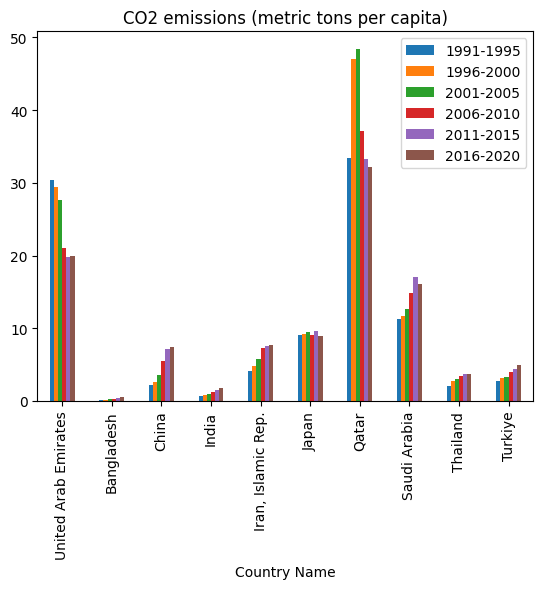

In [798]:
# filtering data frame according to co2 emissions
co2 = data[data['Indicator Name'].
           isin(['CO2 emissions (metric tons per capita)'])]

#  plotting bar chart showing the distribution of co2 emission in different countries
co2.set_index('Country Name').plot(kind='bar')
plt.title('CO2 emissions (metric tons per capita)')


# Electric power consumption

Text(0.5, 1.0, 'Electric power consumption (kWh per capita)')

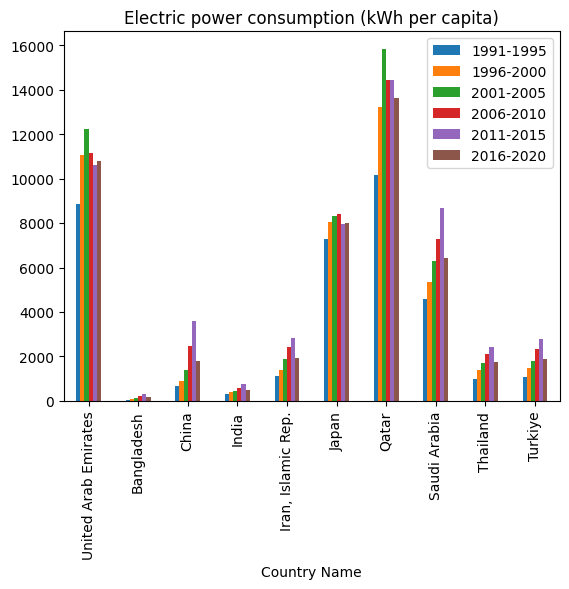

In [799]:
# filtering data acccording eletric power consumption
electric_power = data[data['Indicator Name'].
                      isin(['Electric power consumption (kWh per capita)'])]

# plotting bar chart showing the countries on x axis and values on y axis
electric_power.set_index('Country Name').plot(kind='bar')
plt.title('Electric power consumption (kWh per capita)')

# heatmap for qatar

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12900\2554733132.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  qatar.set_axis(['CO2',


Text(0.5, 1.0, 'Qatar')

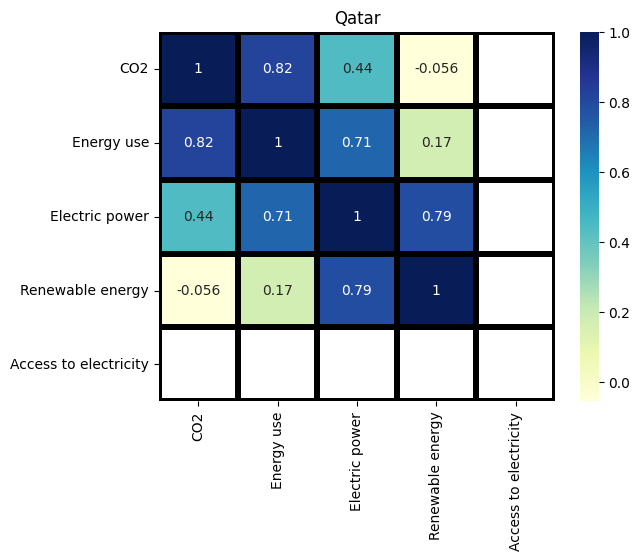

In [800]:
# filtering countries for qatar and making a datafrane of only qatar
qatar = data[data['Country Name'].isin(['Qatar'])]
qatar = qatar.drop(['Country Name'],axis=1).T

# Reseting column name to short form to avoid space in heatmap
qatar.set_axis(['CO2',
       'Energy use',
       'Electric power',
       'Renewable energy',
       'Access to electricity'], axis='columns', inplace=True)

# Saving column names to a variable
cols = qatar.columns 
# Converting the columns to numeric
qatar=qatar[cols].apply(pd.to_numeric, errors='coerce') 

# Creating correlation heatmap of different factors for qatar
sns.heatmap(qatar.corr(), cmap="YlGnBu", 
            annot=True, linewidths=3, linecolor='black')
plt.title('Qatar')

# Energy use 

Text(0.5, 1.0, 'Energy use (kg of oil equivalent per capita)')

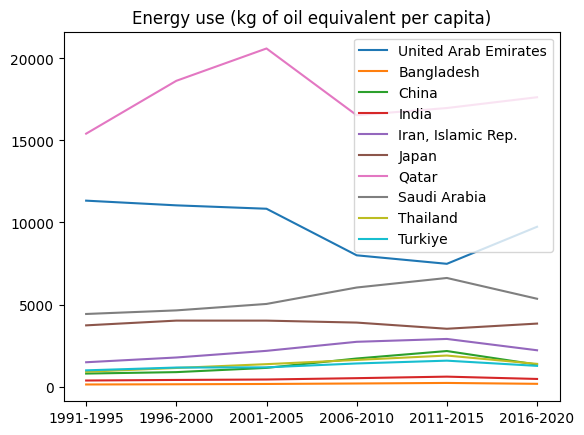

In [805]:
# filtering data for energy use factor for all countries
Energy_use = data[data['Indicator Name'].
                isin(['Energy use (kg of oil equivalent per capita)'])]

#plotting the distribution of energy use as line plot showing the 
# distribution of energy use in different countries
Energy_use.drop('Indicator Name',
                axis=1).set_index('Country Name').T.plot().legend(loc='upper right')
plt.title('Energy use (kg of oil equivalent per capita)')

# Renewable energy

Text(0.5, 1.0, 'Renewable energy consumption (% of total final energy consumption)')

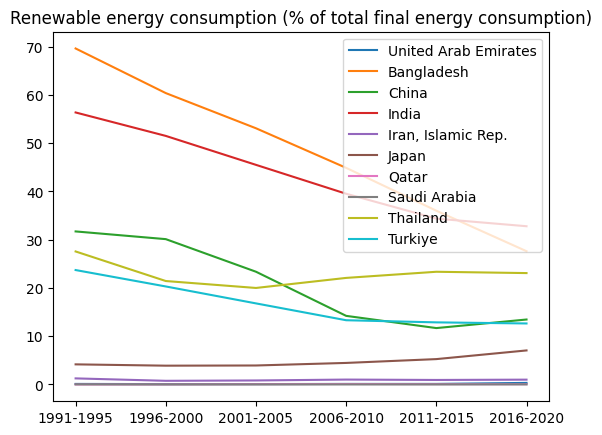

In [802]:
# filtering values for renewable energy consumption
Renewable_energy = data[data['Indicator Name'].
                      isin(['Renewable energy consumption (% of total final energy consumption)'])]

# line plot showing the distribution of renewable energy consumption in different countires
Renewable_energy.drop('Indicator Name',
                      axis=1).set_index('Country Name').T.plot().legend(loc='upper right')
plt.title('Renewable energy consumption (% of total final energy consumption)')

# Heatmap for bangladesh

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12900\848104721.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  bangladesh.set_axis(['CO2',


Text(0.5, 1.0, 'Bangladesh')

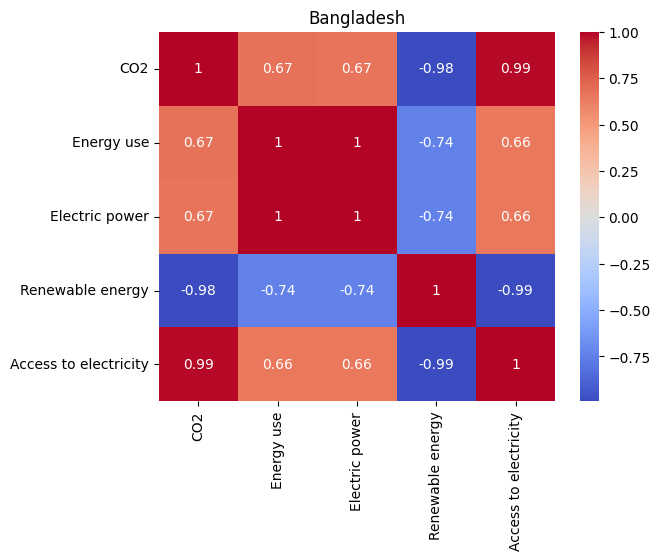

In [803]:
# Filtering countries values for bangladesh 
bangladesh = data[data['Country Name'].isin(['Bangladesh'])]
bangladesh = bangladesh.drop(['Country Name', 'Indicator Name'], axis=1).T

# renaming columns to short forms to avoid spcae problem in heatmap
bangladesh.set_axis(['CO2',
       'Energy use',
       'Electric power',
       'Renewable energy',
       'Access to electricity'], axis='columns', inplace=True)
bangladesh.reset_index(drop=True, inplace=True)

# Saving column names to a variable
cols = bangladesh.columns 
# Converting the columns to numeric
bangladesh=bangladesh[cols].apply(pd.to_numeric, errors='coerce') 

# creating correlation heatmap for bangladesh
sns.heatmap(bangladesh.corr(), cmap= 'coolwarm', annot=True)
plt.title('Bangladesh')

# Dataframe fro access to electricity

In [807]:
# creating dataframe for acces to electricity 
Access_to_electricity = data[data['Indicator Name'].
                             isin(['Access to electricity (% of population)'
                                   ])].set_index('Country Name').drop('Indicator Name',axis=1)
Access_to_electricity

,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020
Country Name,,,,,,
United Arab Emirates,100.0,100.0,100.0,100.0,100.0,100.0
Bangladesh,14.610269,26.366159,39.675595,52.917892,64.911862,88.823999
China,98.747851,97.021797,97.751494,99.004546,99.96142,100.0
India,50.706695,56.520398,62.825459,72.643851,80.274365,94.670201
"Iran, Islamic Rep.",99.007832,97.900002,98.329135,99.030838,99.801186,99.978
Japan,100.0,100.0,100.0,100.0,100.0,100.0
Qatar,100.0,100.0,100.0,100.0,100.0,100.0
Saudi Arabia,100.0,100.0,100.0,100.0,100.0,99.966
Thailand,94.090575,82.099998,91.700941,97.365347,99.392596,99.893993
